### Library Import

In [177]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [178]:
df = pd.read_csv('sensor.csv')
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

In [179]:
df.head()

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


## Data Description

In [180]:
### data shape
df.shape

(220320, 54)

In [181]:
df.describe()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
count,210112.000000,219951.000000,220301.000000,220301.000000,220301.000000,220301.000000,215522.000000,214869.000000,215213.000000,215725.000000,...,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,143303.000000,204937.000000
mean,2.372221,47.591611,50.867392,43.752481,590.673936,73.396414,13.501537,15.843152,15.200721,14.799210,...,35.453455,43.879591,42.656877,43.094984,48.018585,44.340903,150.889044,57.119968,183.049260,202.699667
std,0.412227,3.296666,3.666820,2.418887,144.023912,17.298247,2.163736,2.201155,2.037390,2.091963,...,10.259521,11.044404,11.576355,12.837520,15.641284,10.442437,82.244957,19.143598,65.258650,109.588607
min,0.000000,0.000000,33.159720,31.640620,2.798032,0.000000,0.014468,0.000000,0.028935,0.000000,...,22.135416,24.479166,25.752316,26.331018,26.331018,27.199070,26.331018,26.620370,27.488426,27.777779
25%,2.438831,46.310760,50.390620,42.838539,626.620400,69.976260,13.346350,15.907120,15.183740,15.053530,...,32.812500,39.583330,36.747684,36.747684,40.509258,39.062500,83.912030,47.743060,167.534700,179.108800
50%,2.456539,48.133678,51.649300,44.227428,632.638916,75.576790,13.642940,16.167530,15.494790,15.082470,...,35.156250,42.968750,40.509260,40.219910,44.849540,42.534720,138.020800,52.662040,193.865700,197.338000
75%,2.499826,49.479160,52.777770,45.312500,637.615723,80.912150,14.539930,16.427950,15.697340,15.118630,...,36.979164,46.614580,45.138890,44.849540,51.215280,46.585650,208.333300,60.763890,219.907400,216.724500
max,2.549016,56.727430,56.032990,48.220490,800.000000,99.999880,22.251160,23.596640,24.348960,25.000000,...,374.218800,408.593700,1000.000000,320.312500,370.370400,303.530100,561.632000,464.409700,1000.000000,1000.000000


### Missing values treatment

In [182]:
### Missing values in each column
df_missing = df.count()/len(df)
df_missing = (1-df_missing)*100
df_missing.sort_values(ascending=False).head(60)

sensor_15         100.000000
sensor_50          34.956881
sensor_51           6.982117
sensor_00           4.633261
sensor_07           2.474129
sensor_08           2.317992
sensor_06           2.177741
sensor_09           2.085603
sensor_01           0.167484
sensor_30           0.118464
sensor_29           0.032680
sensor_32           0.030864
sensor_18           0.020879
sensor_17           0.020879
sensor_22           0.018609
sensor_25           0.016340
sensor_16           0.014070
sensor_49           0.012255
sensor_48           0.012255
sensor_47           0.012255
sensor_46           0.012255
sensor_45           0.012255
sensor_44           0.012255
sensor_43           0.012255
sensor_42           0.012255
sensor_41           0.012255
sensor_40           0.012255
sensor_39           0.012255
sensor_38           0.012255
sensor_14           0.009532
sensor_26           0.009078
sensor_03           0.008624
sensor_10           0.008624
sensor_13           0.008624
sensor_12     

In [183]:
### Exlcude the columns having missing values more than 40%
df = df.loc[:, df_missing<40]

In [184]:
idx = df[df['sensor_51'].isna()].index

df.loc[idx.union(idx - 5).union(idx + 5)].sort_index()[['timestamp', 'sensor_51']].head(10)

,timestamp,sensor_51
25107,2018-04-18 10:27:00,35.300926
25112,2018-04-18 10:32:00,NaN
25117,2018-04-18 10:37:00,35.300926
38503,2018-04-27 17:43:00,198.784700
38504,2018-04-27 17:44:00,203.125000
38505,2018-04-27 17:45:00,208.912000
38506,2018-04-27 17:46:00,215.277800
38507,2018-04-27 17:47:00,221.064800
38508,2018-04-27 17:48:00,NaN
38509,2018-04-27 17:49:00,NaN


In [185]:
# import numpy as np

# df = df.copy()

# sensor_cols = [col for col in df.columns.tolist() if 'sensor' in col]

# for col in sensor_cols[:1]:
#     na_idx = df[df[col].isna()].index

#     for i in na_idx:
#         # need at least 2 previous valid values
#         if i >= 2:
#             last = df.loc[i-1, col]
#             prev = df.loc[i-2, col]

#             if not np.isnan(last) and not np.isnan(prev):
#                 df.loc[i, col] = last + (last - prev)


In [186]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df[sensor_cols] = imputer.fit_transform(df[sensor_cols])

### Timeseries of sensor_00 against machine_status

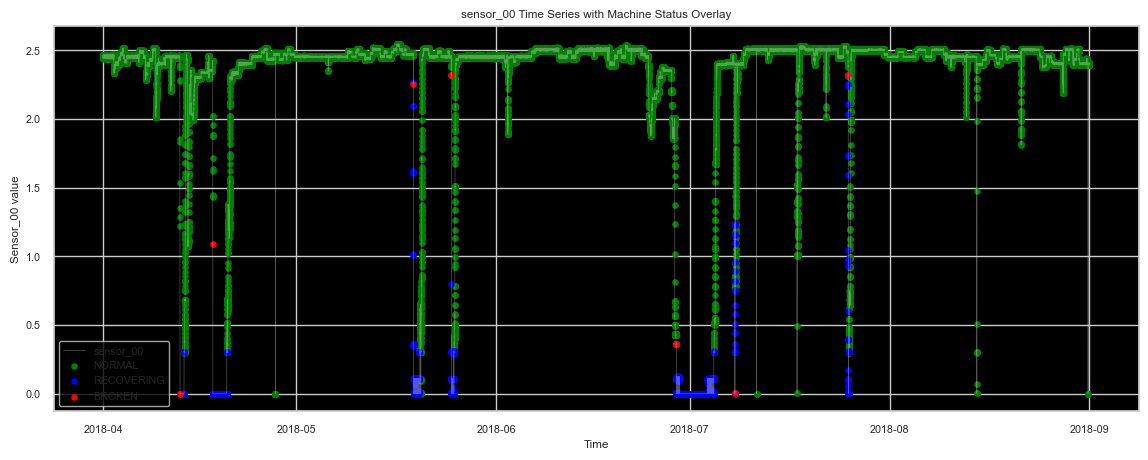

In [147]:
import pandas as pd
import matplotlib.pyplot as plt

# ensure time ordering
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values('timestamp')

plt.figure(figsize=(14, 5))

# light, thin sensor line
plt.plot(
    df['timestamp'],
    df['sensor_00'],
    color='lightgray',
    linewidth=0.5,
    alpha=0.4,
    label='sensor_00'
)

status_colors = {
    'NORMAL': 'green',
    'RECOVERING': 'blue',
    'BROKEN': 'red'
}

for status, color in status_colors.items():
    status_df = df[df['machine_status'] == status]
    plt.scatter(
        status_df['timestamp'],
        status_df['sensor_00'],
        color=color,
        s=14,
        label=status
    )

plt.xlabel("Time")
plt.ylabel("Sensor_00 value")
plt.title("sensor_00 Time Series with Machine Status Overlay")
plt.legend()
plt.show()

### For the Sensor_00 whenever the Sensor value dropping below 1.5 there is chance of Machine going to Recovering or Broken status.

### Correlation Heatmap

In [187]:
sensor_cols = [x for x in df.columns.tolist() if 'sensor' in x]

In [188]:
df['machine_status_binary'] = df['machine_status'].apply(
    lambda x: 'NORMAL' if x == 'NORMAL' else 'ABNORMAL'
)

In [189]:
df['machine_status_int'] = (df['machine_status'] != 'NORMAL').astype(int)

Text(0.5, 1.0, 'Feature Correlation using Heatmap')

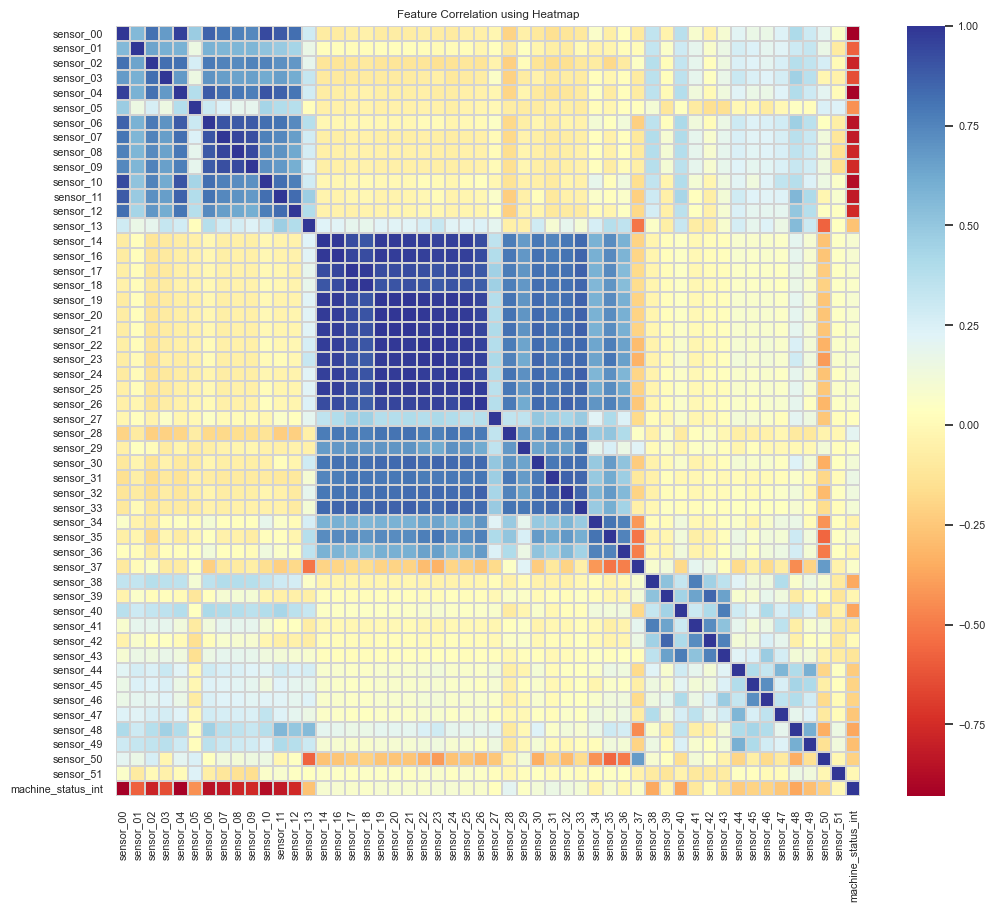

In [151]:
plt.figure(figsize=(12, 10))
sns.set(font_scale=0.7)
sns.set_style("whitegrid", {"axes.facecolor": ".0"})

cluster = df[sensor_cols + ['machine_status_int']].corr()
plot_kws={"s": 1}
sns.heatmap(cluster,
            cmap='RdYlBu',
            # annot=True,
            linewidths=0.2,
            linecolor='lightgrey').set_facecolor('white')
plt.title("Feature Correlation using Heatmap")

In [152]:
abs(df[sensor_cols + ['machine_status_int']].corr()['machine_status_int']).sort_values(ascending=False)

machine_status_int    1.000000
sensor_00             0.929417
sensor_04             0.915695
sensor_10             0.872143
sensor_06             0.850873
sensor_11             0.823170
sensor_07             0.819370
sensor_02             0.785609
sensor_08             0.777744
sensor_12             0.758554
sensor_09             0.758052
sensor_03             0.638397
sensor_01             0.580239
sensor_05             0.434353
sensor_40             0.375036
sensor_48             0.366578
sensor_38             0.360313
sensor_49             0.285542
sensor_13             0.269825
sensor_47             0.254900
sensor_44             0.235698
sensor_50             0.206081
sensor_28             0.203304
sensor_45             0.202556
sensor_46             0.202518
sensor_31             0.158512
sensor_32             0.136423
sensor_43             0.118554
sensor_30             0.114708
sensor_33             0.104610
sensor_41             0.103617
sensor_24             0.098824
sensor_2

As per Correlation analysis, the Top 3 Sensors which are strongest predictors of failure:
1. sensor_04
2. sensor_10
3. sensor_06

In [190]:
sensors = ['sensor_04', 'sensor_10', 'sensor_06']

summary_df = (
    df
    .groupby('machine_status_int')[sensors]
    .agg(['mean', 'std', 'min', 'max'])
)

summary_df


sensor_04                                  sensor_10  \
                          mean         std       min       max       mean   
machine_status_int                                                          
0                   625.670903   50.821775  2.798032  800.0000  44.268723   
1                    93.322665  118.441656  2.798032  612.1528   1.701755   

                                            sensor_06                      \
                        std  min       max       mean       std       min   
machine_status_int                                                          
0                   6.04796  0.0  76.10686  13.865048  0.864919  0.014468   
1                   3.44275  0.0  58.23381   8.335594  5.519989  0.014468   

                              
                         max  
machine_status_int            
0                   15.96499  
1                   22.25116

1. The average reading of Sensor_00 for Normal operation is 625 but to that of Abnormal operation is around 93. 
   Similarly for Sensor_06 & Sensor_10 the Normal readings are 13 & 44 and abnormal readings are 3.89 & 1.6.

In [191]:
# select only those sensors which has correlation value greater than 0.2
corr_matrix = df[sensor_cols + ['machine_status_int']].corr()
# correlation with target
target_corr = corr_matrix['machine_status_int'].drop('machine_status_int')

# select features
selected_sensors = target_corr[abs(target_corr) > 0.1].index.tolist()

### Target variable based on Time horizon

In [192]:
horizons = {
    '15min': 15 * 60,   # 900 seconds
    '30min': 30 * 60,   # 1800 seconds
    '60min': 60 * 60    # 3600 seconds
}

In [193]:
for name, h in horizons.items():
    df[f'target_future_{name}'] = (
        df['machine_status_int']
        .rolling(window=h, min_periods=1)
        .max()
        .shift(-h)
    )

In [194]:
for name in horizons:
    print(name, df[f'target_future_{name}'].value_counts(normalize=True))

15min target_future_15min
0.0    0.905309
1.0    0.094691
Name: proportion, dtype: float64
30min target_future_30min
0.0    0.876089
1.0    0.123911
Name: proportion, dtype: float64
60min target_future_60min
0.0    0.81692
1.0    0.18308
Name: proportion, dtype: float64


#### Checking VIFs

In [25]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [26]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,sensor_07,20.16
4,sensor_04,18.28
0,sensor_00,16.78
6,sensor_06,13.17
10,sensor_10,12.25
8,sensor_08,12.19
9,sensor_09,12.12
11,sensor_11,10.50
17,sensor_32,9.54
2,sensor_02,7.89


In [195]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        #self.z_scores = z_scores
        self.p_values = p_values
        #self.sigma_estimates = sigma_estimates
        #self.F_ij = F_ij

In [196]:
reg = LogisticRegression_with_p_values()

In [197]:
def find_valid_split_index(y, start_frac=0.8, min_frac=0.5):
    """
    Finds the earliest split index (moving backward)
    such that the test set contains both classes.
    """
    for frac in np.linspace(start_frac, min_frac, 20):
        idx = int(frac * len(y))
        if y.iloc[idx:].nunique() > 1:
            return idx
    return None


In [198]:
import numpy as np
from sklearn.metrics import roc_auc_score

horizon_targets = ['machine_status_int','target_future_15min', 'target_future_30min', 'target_future_60min']

results = {}

for target in horizon_targets:
    print(f"\nEvaluating {target}")

    data = df.dropna(subset=[target])

    X = data[selected_sensors]
    y = data[target]

    # 🔹 find valid split (MINIMAL CHANGE)
    split_idx = find_valid_split_index(y)

    if split_idx is None:
        print("⚠️ No valid test window with positive class")
        results[target] = np.nan
        continue

    X_train = X.iloc[:split_idx]
    y_train = y.iloc[:split_idx]

    X_test = X.iloc[split_idx:]
    y_test = y.iloc[split_idx:]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled  = scaler.transform(X_test)

    reg.fit(X_train_scaled, y_train)

    y_test_proba = reg.model.predict_proba(X_test_scaled)[:, 1]
    auc = roc_auc_score(y_test, y_test_proba)

    results[target] = auc
    print(f"AUROC: {auc:.4f}")



Evaluating machine_status_int
AUROC: 0.9976

Evaluating target_future_15min
AUROC: 0.9559

Evaluating target_future_30min
AUROC: 0.9670

Evaluating target_future_60min
AUROC: 0.8314


## Model Vaidation

### Model with Horizon of 60 minutes

In [199]:
target = 'target_future_60min'

data = df.dropna(subset=[target])

X = data[selected_sensors]
y = data[target]

# 🔹 find valid split (MINIMAL CHANGE)
split_idx = find_valid_split_index(y)

if split_idx is None:
    print("⚠️ No valid test window with positive class")
    results[target] = np.nan

X_train = X.iloc[:split_idx]
y_train = y.iloc[:split_idx]

X_test = X.iloc[split_idx:]
y_test = y.iloc[split_idx:]

print("Test class distribution:")
print(y_test.value_counts())

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

reg.fit(X_train_scaled, y_train)

Test class distribution:
target_future_60min
0.0    50205
1.0     3405
Name: count, dtype: int64


In [200]:
p_values = reg.p_values
p_values = np.append(np.nan, np.array(p_values))

In [201]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = X_train.columns.tolist())
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
# In the 'summary_table' dataframe, we add a new column, called 'p_values', containing the values from the 'p_values' variable.
summary_table = summary_table.sort_index()
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.583689,NaN
1,sensor_00,-0.061743,1.743382e-06
2,sensor_01,-0.497314,1.117195e-244
3,sensor_02,-0.442832,2.219184e-77
4,sensor_03,0.180447,3.422791e-27
5,sensor_04,-1.424016,0.000000e+00
6,sensor_05,0.293964,3.816964e-86
7,sensor_06,-0.016820,5.006894e-01
8,sensor_07,0.225264,1.731936e-14
9,sensor_08,-0.060456,2.914277e-03


In [239]:
summary_table.sort_values(by='Coefficients',ascending=False)

,Feature name,Coefficients,p_values
15,sensor_28,1.668558,0.000000e+00
30,sensor_50,1.337565,0.000000e+00
12,sensor_11,0.659841,5.209223e-153
17,sensor_31,0.482820,8.564117e-164
6,sensor_05,0.293964,3.816964e-86
8,sensor_07,0.225264,1.731936e-14
4,sensor_03,0.180447,3.422791e-27
21,sensor_40,0.167713,4.949473e-30
14,sensor_13,0.166538,1.186061e-83
24,sensor_44,0.109875,1.071995e-22


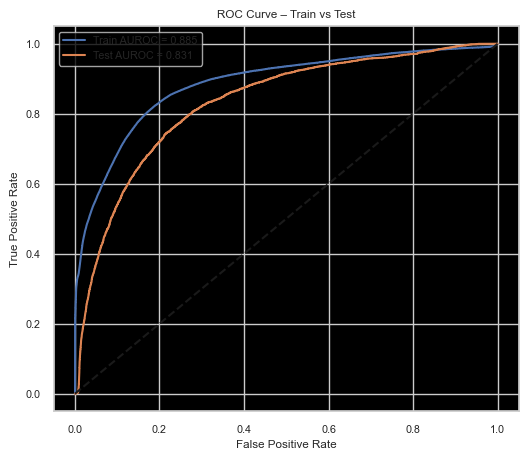

Train AUROC: 0.8846822969228962
Test AUROC : 0.831443024860919
Gini : 0.6628860497218381


In [202]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# train predicted probabilities
y_train_proba = reg.model.predict_proba(X_train_scaled)[:, 1]

df_train = pd.DataFrame({
    'target': y_train,
    'proba': y_train_proba
})

fpr_tr, tpr_tr, _ = roc_curve(df_train['target'], df_train['proba'])
auroc_tr = roc_auc_score(df_train['target'], df_train['proba'])

# ===============================
# TEST
# ===============================
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

X_test = scaler.transform(X_test)

# test predicted probabilities
y_test_proba = reg.model.predict_proba(X_test)[:, 1]

df_test = pd.DataFrame({
    'target': y_test,
    'proba': y_test_proba
})

fpr_te, tpr_te, _ = roc_curve(df_test['target'], df_test['proba'])
auroc_te = roc_auc_score(df_test['target'], df_test['proba'])

# ===============================
# PLOT TRAIN + TEST ROC
# ===============================
plt.figure(figsize=(6, 5))
plt.plot(fpr_tr, tpr_tr, label=f'Train AUROC = {auroc_tr:.3f}')
plt.plot(fpr_te, tpr_te, label=f'Test AUROC = {auroc_te:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='k')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Train vs Test')
plt.legend()
plt.show()

# ===============================
# PRINT AUROC
# ===============================
print("Train AUROC:", auroc_tr)
print("Test AUROC :", auroc_te)
print("Gini :", (auroc_te * 2) - 1)



In [203]:
from sklearn.metrics import average_precision_score

ap = average_precision_score(y_test, y_test_proba)
print("Test PR-AUC:", ap)


Test PR-AUC: 0.2565597869928139


In [204]:
baseline = y_test.mean()
print("Baseline PR-AUC:", baseline)


Baseline PR-AUC: 0.06351426972579742


### Random Forest Model

In [210]:
from sklearn.ensemble import RandomForestClassifier


In [226]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=3,
    min_samples_leaf=2000,
    min_samples_split=2000,
    max_features='sqrt',
    class_weight='balanced',
    random_state=100,
    oob_score=True
)

In [227]:
%%time
target = 'target_future_60min'

data = df.dropna(subset=[target])

X = data[selected_sensors]
y = data[target]

# 🔹 find valid split (MINIMAL CHANGE)
split_idx = find_valid_split_index(y)

if split_idx is None:
    print("⚠️ No valid test window with positive class")
    results[target] = np.nan

X_train = X.iloc[:split_idx]
y_train = y.iloc[:split_idx]

X_test = X.iloc[split_idx:]
y_test = y.iloc[split_idx:]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

rf.fit(X_train_scaled, y_train)

CPU times: total: 1min 4s
Wall time: 2min 4s


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",300
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",3
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2000
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",2000
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `met

In [220]:
rf.oob_score_

0.942977131996812

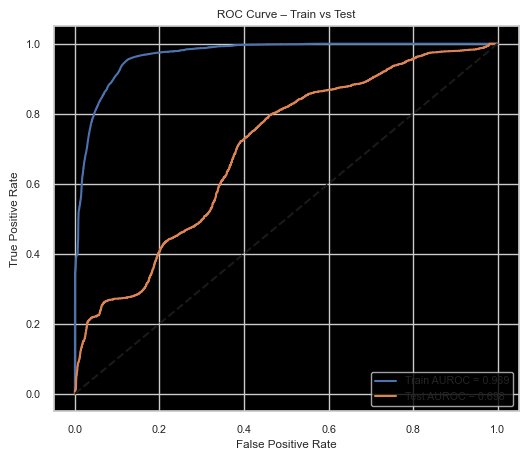

Train AUROC: 0.9687307459479292
Test AUROC : 0.6980245135911924
Gini : 0.3960490271823849


In [225]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# train predicted probabilities
y_train_proba = rf.predict_proba(X_train_scaled)[:, 1]

df_train = pd.DataFrame({
    'target': y_train,
    'proba': y_train_proba
})

fpr_tr, tpr_tr, _ = roc_curve(df_train['target'], df_train['proba'])
auroc_tr = roc_auc_score(df_train['target'], df_train['proba'])

# ===============================
# TEST
# ===============================
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

X_test_scaled = scaler.transform(X_test)

# test predicted probabilities
y_test_proba = rf.predict_proba(X_test_scaled)[:, 1]

df_test = pd.DataFrame({
    'target': y_test,
    'proba': y_test_proba
})

fpr_te, tpr_te, _ = roc_curve(df_test['target'], df_test['proba'])
auroc_te = roc_auc_score(df_test['target'], df_test['proba'])

# ===============================
# PLOT TRAIN + TEST ROC
# ===============================
plt.figure(figsize=(6, 5))
plt.plot(fpr_tr, tpr_tr, label=f'Train AUROC = {auroc_tr:.3f}')
plt.plot(fpr_te, tpr_te, label=f'Test AUROC = {auroc_te:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='k')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Train vs Test')
plt.legend()
plt.show()

# ===============================
# PRINT AUROC
# ===============================
print("Train AUROC:", auroc_tr)
print("Test AUROC :", auroc_te)
print("Gini :", (auroc_te * 2) - 1)

In [ ]:
### Feature Importance

In [229]:
feature_imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf.feature_importances_
})

In [232]:
feature_imp_df = feature_imp_df.sort_values(by='Imp',ascending=False)
feature_imp_df['Imp'] = feature_imp_df['Imp'] * 100
feature_imp_df

,Varname,Imp
14,sensor_28,24.553871
0,sensor_00,13.424372
15,sensor_30,8.259177
13,sensor_13,7.196477
10,sensor_10,6.554581
4,sensor_04,6.479977
11,sensor_11,5.212430
12,sensor_12,4.737337
16,sensor_31,3.685188
29,sensor_50,3.231584


### Shap Values

In [234]:
import shap

explainer = shap.TreeExplainer(rf)

In [248]:
shap_values.shape

(53610, 30, 2)

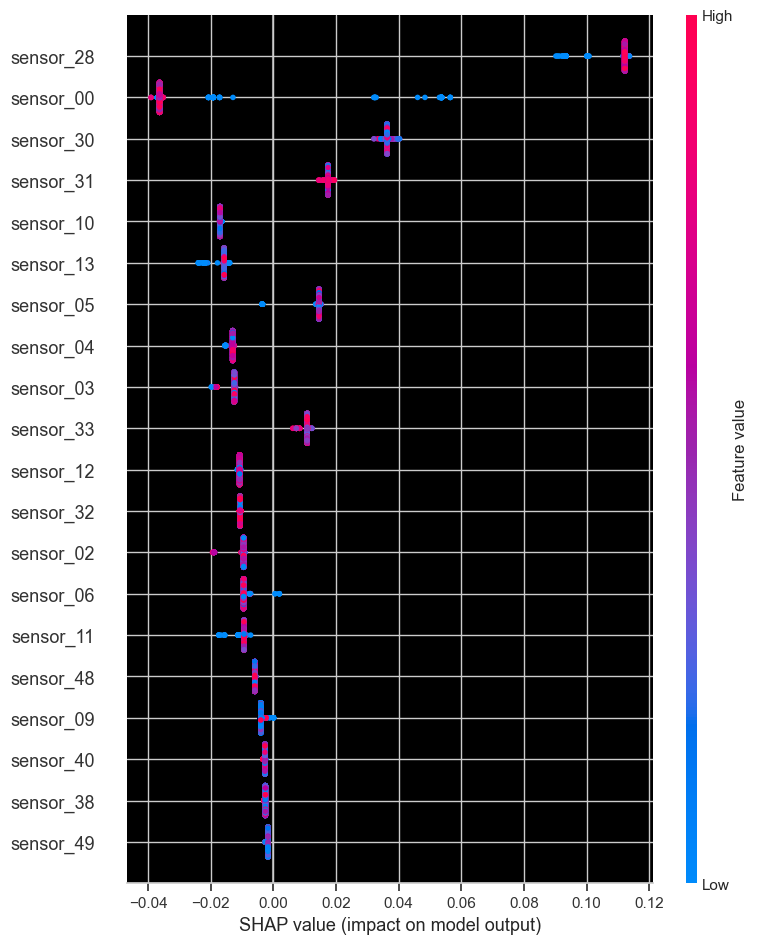

In [250]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(
    shap_values[:, :, 1],
    X_test,  
    feature_names=X_test.columns
)

### Sensor 28 Analysis

<Axes: >

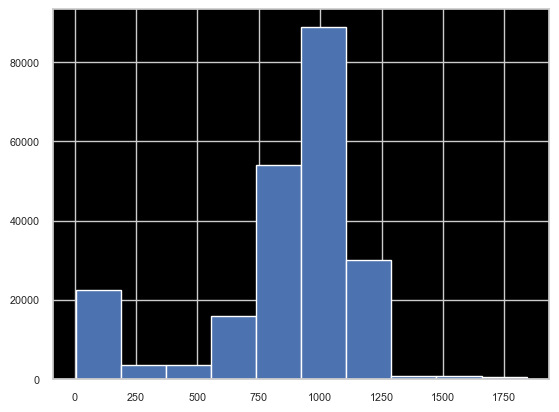

In [255]:
df['sensor_28'].hist()

In [257]:
df.groupby('machine_status_int')['sensor_28'].agg(['mean', 'std', 'min', 'max'])

,mean,std,min,max
machine_status_int,,,,
0,834.806759,315.718867,4.319347,1841.146
1,1091.627409,112.486311,113.088200,1422.577


In [258]:
df['sensor_28_bkt'] = pd.qcut(df['sensor_28'],q=5)

In [260]:
df.groupby('sensor_28_bkt').agg({'machine_status_int' : ['count','sum','mean']}).reset_index()

C:\Users\G-Square\AppData\Local\Temp\ipykernel_20848\2778685410.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sensor_28_bkt').agg({'machine_status_int' : ['count','sum','mean']}).reset_index()


sensor_28_bkt machine_status_int                
                                     count   sum      mean
0      (4.318, 725.625]              44064   196  0.004448
1    (725.625, 893.767]              44064    41  0.000930
2    (893.767, 998.907]              44064   210  0.004766
3   (998.907, 1055.133]              44065  5125  0.116305
4  (1055.133, 1841.146]              44063  8912  0.202256

### This indicates that as sensor_28 reading increases the probability of Abnormal status is high.